In [2]:
import numpy as np
import scipy as sc
from numpy import fft
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import cv2
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
#Variable set up for notebook
import os #used to get wav filespritn

FFT_SIZE=1024
num_freq_bins=10
num_time_bins=6
%matplotlib inline
cmap=plt.cm.inferno
cmap.set_under(color='k', alpha=None)

blender_dir = "/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender"
vacuum_dir = "/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum"
music_dir = "/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music"
alarm_dir = "/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm"
microwave_dir = "/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave"

blender_file_list = ['/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B10-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B11-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B12-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B13-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B14-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B15-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B16-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B17-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B18-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B19-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B2.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B20.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B3.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B4.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B5.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B6-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B7-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B8-1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Blender/B9-1.wav']
vacuum_file_list = ['/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V10.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V11.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V12.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V13.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V14.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V15.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V16.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V17.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V18.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V19.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V2.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V20.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V3.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V4.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V5.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V6.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V7.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V8.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Vacuum/V9.wav']
music_file_list = ['/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M11.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M12.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M13.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M14.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M21.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M22.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M23.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M24.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M31.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M32.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M33.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M34.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M41.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M42.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M43.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M44.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M51.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M52.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M53.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Music/M54.wav']
microwave_file_list = ['/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/10.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/11.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/12.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/13.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/14.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/15.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/16.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/17.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/18.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/19.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/2.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/20.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/3.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/4.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/5.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/6.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/7.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/8.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Microwave/9.wav']
alarm_file_list = ['/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm1.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm19.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm18.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm2.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm3.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm7.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm6.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm4.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm20.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm5.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm8.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm10.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm11.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm9.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm13.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm12.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm16.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm17.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm15.wav', '/Users/bassel/Google Drive/CMU/17-728/Sound Assignment/Alarm/alarm14.wav']

files = [blender_file_list,vacuum_file_list,music_file_list,microwave_file_list]
# for file in os.listdir(alarm_dir):
#     if file.endswith(".wav"):
#         alarm_file_list.append(alarm_dir +"/"+ file)

print(len(blender_file_list))

# vacuum_file_list = []

# for file in os.listdir(microwave_dir):
#     if file.endswith(".wav"):
#         vacuum_file_list.append(microwave_dir +"/"+ file)

# print(vacuum_file_list)

20


In [7]:
b_fs,b_y = wavfile.read(blender_file_list[0])
m_fs,m_y = wavfile.read(music_file_list[0])
w_fs,w_y = wavfile.read(microwave_file_list[0])
a_fs,a_y = wavfile.read(alarm_file_list[0])
v_fs,v_y = wavfile.read(vacuum_file_list[0])

f,t,b_pxx = signal.spectrogram(b_y, nperseg=FFT_SIZE, fs=b_fs, noverlap=FFT_SIZE/2)
f,t,m_pxx = signal.spectrogram(m_y, nperseg=FFT_SIZE, fs=m_fs, noverlap=FFT_SIZE/2)
f,t,v_pxx = signal.spectrogram(v_y, nperseg=FFT_SIZE, fs=v_fs, noverlap=FFT_SIZE/2)
f,t,a_pxx = signal.spectrogram(a_y, nperseg=FFT_SIZE, fs=a_fs, noverlap=FFT_SIZE/2)
f,t,w_pxx = signal.spectrogram(w_y, nperseg=FFT_SIZE, fs=w_fs, noverlap=FFT_SIZE/2)

# Blender Spectrograph

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


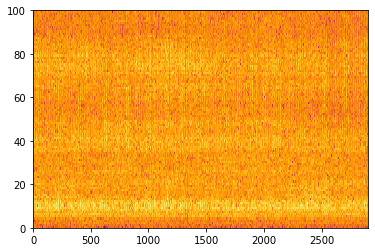

In [8]:
plt.pcolormesh(np.log10(b_pxx[0:100,:]),cmap=cmap)

# Binned Blender Spectrograph

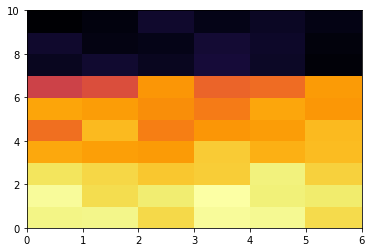

In [9]:
b_resized_pxx=cv2.resize(b_pxx[:,:],(num_time_bins,num_freq_bins))
plt.pcolormesh(np.log10(b_resized_pxx),cmap=cmap)

# Vacuum Spectrograph

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


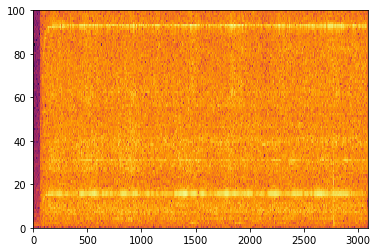

In [10]:
plt.pcolormesh(np.log10(v_pxx[0:100,:]),cmap=cmap)

# Binned Vacuum Spectrograph

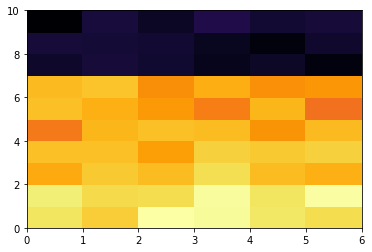

In [11]:
v_resized_pxx=cv2.resize(v_pxx[:,:],(num_time_bins,num_freq_bins))
plt.pcolormesh(np.log10(v_resized_pxx),cmap=cmap)

# Microwave Spectrograph

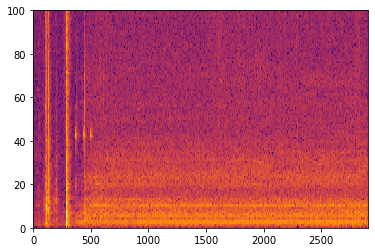

In [12]:
plt.pcolormesh(np.log10(w_pxx[0:100,:]),cmap=cmap)

# Binned Microwave Spectrograph

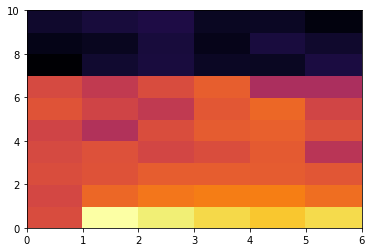

In [13]:
w_resized_pxx=cv2.resize(w_pxx[:,:],(num_time_bins,num_freq_bins))
plt.pcolormesh(np.log10(w_resized_pxx),cmap=cmap)

# Music Spectrograph

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


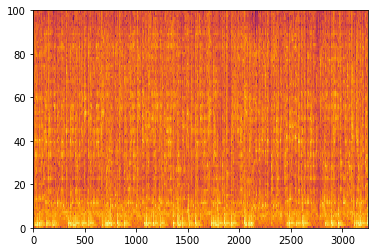

In [14]:
plt.pcolormesh(np.log10(m_pxx[0:100,:]),cmap=cmap)

# Binned Music spectrograph

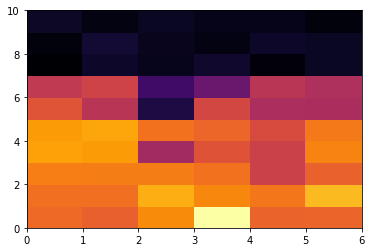

In [15]:
m_resized_pxx=cv2.resize(m_pxx[:,:],(num_time_bins,num_freq_bins))
plt.pcolormesh(np.log10(m_resized_pxx),cmap=cmap)

# Alarm Spectrograph

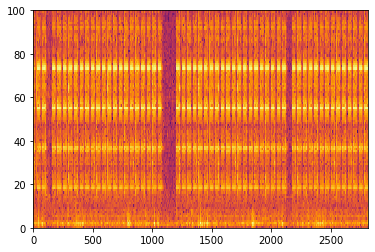

In [16]:
plt.pcolormesh(np.log10(a_pxx[0:100,:]),cmap=cmap)

# Binned Alarm Spectrograph

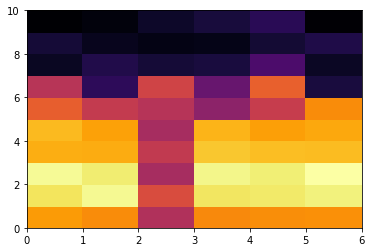

In [17]:
a_resized_pxx=cv2.resize(a_pxx[:,:],(num_time_bins,num_freq_bins))
plt.pcolormesh(np.log10(a_resized_pxx),cmap=cmap)

In [27]:
#creating binned feature vector

x_b = np.empty((0,60))
y_lab_b = []
y_lab_val = 0


for file_list in files:
    for file in file_list:
        fs,y = wavfile.read(file)
        f,t,pxx = signal.spectrogram(y, nperseg=FFT_SIZE, fs=fs, noverlap=FFT_SIZE/2)
        resized_pxx=cv2.resize(pxx[:,:],(num_time_bins,num_freq_bins))
        x_i = np.array(resized_pxx.flatten(),ndmin=2)
        x_b = np.append(x_b,x_i, axis=0)
        y_lab_b.append(y_lab_val)
    y_lab_val = y_lab_val + 1

In [28]:
#creating binned and windowed feature vector

x_bw = np.empty((0,60))

y_lab_bw = []
y_lab_val = 0

num_of_windows = 10

for file_list in files:
    for file in file_list:
        sample_start = 0
        fs,y = wavfile.read(file)
        f,t,pxx = signal.spectrogram(y, nperseg=FFT_SIZE, fs=fs, noverlap=FFT_SIZE/2)
        
        time_vectors = pxx.shape[1]
        size_of_window = int(time_vectors/num_of_windows)
        overlap = int(size_of_window/2)

        while((sample_start+size_of_window) < time_vectors):
            window_pxx = pxx[:,sample_start:(sample_start+size_of_window)]
            resized_windowed_pxx=cv2.resize(window_pxx[:,:],(num_time_bins,num_freq_bins))
            x_i = np.array(resized_windowed_pxx.flatten(),ndmin=2)
            x_bw = np.append(x_bw,x_i, axis=0)
            y_lab_bw.append(y_lab_val)
            
            sample_start = sample_start + overlap
    y_lab_val = y_lab_val + 1


In [29]:
#creating windowed feature vector

y_lab_w = []
y_lab_val = 0
x_w = np.empty((0,76))

num_of_windows = 10
for file_list in files:
    for file in file_list:
        t=0
        sample_start = 0
        windows_vector = []
        fv = []
        fs,y = wavfile.read(file)
        
        len_of_window = int((len(y)/num_of_windows))
        overlap = int(len_of_window/2)
        
            
        while((sample_start+len_of_window) <= len(y)):
            windows_vector.append(y[sample_start:(sample_start+len_of_window)])
            y_w = y[sample_start:(sample_start+len_of_window)]
            sample_start = sample_start + overlap
            
            zero_crossings = np.where(np.diff(np.sign(y_w)))[0]
            
            fv.append(len(zero_crossings))#number of zero crossings
            fv.append(np.percentile(y_w, 50))#find value halfway between sorted list
            fv.append(np.percentile(y_w, 70))#find value 70% up the sorted list
            fv.append(np.percentile(y_w, 80))#find value 80% up the sorted list
        x_i = np.array(fv,ndmin=2)
        x_w = np.append(x_w,x_i, axis=0)
        y_lab_w.append(y_lab_val)
            
    y_lab_val = y_lab_val + 1

In [35]:
#creating feature vector from whole window

y_lab = []
y_lab_val = 0



x_x = np.empty((0,4))

for file_list in files:
    for file in file_list:
        fs,y = wavfile.read(file)
        y = sc.ndimage.median_filter(y, size=16) #preprocess the signal with median filtering
        f,t,pxx = signal.spectrogram(y, nperseg=FFT_SIZE, fs=fs, noverlap=FFT_SIZE/2)
        outx = np.empty((513,1))
        zero_crossings = np.where(np.diff(np.sign(y)))[0]

        for i in range(pxx.shape[0]):
            outx[i,:] = np.median(pxx[i,:])
        fv = []
        fv.append(len(zero_crossings))#number of zero crossings
        fv.append(np.percentile(y,50))#find value halfway between sorted list
        fv.append(np.percentile(y, 70))#find value 70% up the sorted list
        fv.append(np.percentile(y, 80))#find value 80% up the sorted list

        x_i = np.array(fv,ndmin=2)
        x_x = np.append(x_x,x_i, axis=0)

        y_lab.append(y_lab_val)
    y_lab_val = y_lab_val + 1

In [36]:
#After collecting features run each feature set through the learning model and test, creating four different models
#for each implementation of the feature set

clf_bw = RandomForestClassifier()
clf_w = RandomForestClassifier()
clf_b = RandomForestClassifier()
clf = RandomForestClassifier()

In [37]:
#running training and k fold cross test validation on the binned only set

scores = []
cv = KFold(n_splits=10, shuffle=True)
y_lab_b = np.array(y_lab_b)

for train_index, test_index in cv.split(x_b):
#     print("Train Index: ", train_index)
#     print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = x_b[train_index], x_b[test_index], y_lab_b[train_index], y_lab_b[test_index]
    clf_b.fit(X_train, y_train)
    scores.append(clf_b.score(X_test, y_test))

print("Mean accuracy:" + str(np.mean(scores)))

Mean accuracy:0.95


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
#running training and k fold cross test validation on the binned and windowed set

scores = []
cv = KFold(n_splits=10, shuffle=True)
y_lab_bw = np.array(y_lab_bw)

for train_index, test_index in cv.split(x_bw):
#     print("Train Index: ", train_index)
#     print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = x_bw[train_index], x_bw[test_index], y_lab_bw[train_index], y_lab_bw[test_index]
    clf_bw.fit(X_train, y_train)
    scores.append(clf_bw.score(X_test, y_test))

print("Mean accuracy:" + str(np.mean(scores)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean accuracy:0.9907807598466365


In [39]:
#running training and k fold cross test validation on the feature set treating it as one whole window

scores = []
cv = KFold(n_splits=10, shuffle=True)
y_lab = np.array(y_lab)

for train_index, test_index in cv.split(x_x):
#     print("Train Index: ", train_index)
#     print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = x_x[train_index], x_x[test_index], y_lab[train_index], y_lab[test_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print("Mean accuracy:" + str(np.mean(scores)))

Mean accuracy:1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
#running training and k fold cross test validation on the windowed only set

scores = []
cv = KFold(n_splits=10, shuffle=True)
y_lab_w = np.array(y_lab_w)

for train_index, test_index in cv.split(x_w):
#     print("Train Index: ", train_index)
#     print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = x_w[train_index], x_w[test_index], y_lab_w[train_index], y_lab_w[test_index]
    clf_w.fit(X_train, y_train)
    scores.append(clf_w.score(X_test, y_test))

print("Mean accuracy:" + str(np.mean(scores)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean accuracy:0.9875
